In [1]:
import pandas as pd

df = pd.read_csv("c:/data/rides/rides2.csv")
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_3964\75693871.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,weekend,num.child,distance,rides,games,wait,clean,overall
0,1,0,114.648259,87,73,60,89,0
1,1,2,27.014097,87,78,76,87,1
2,0,1,63.300975,85,80,70,88,1
3,1,0,25.909931,88,72,66,89,0
4,0,4,54.718307,84,87,74,87,1


C:\Users\user\AppData\Local\Temp\ipykernel_3964\1671689845.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="overall", data=df, palette=colors)


Text(0.5, 1.0, '분류\n (0: 만족, 1: 불만족)')

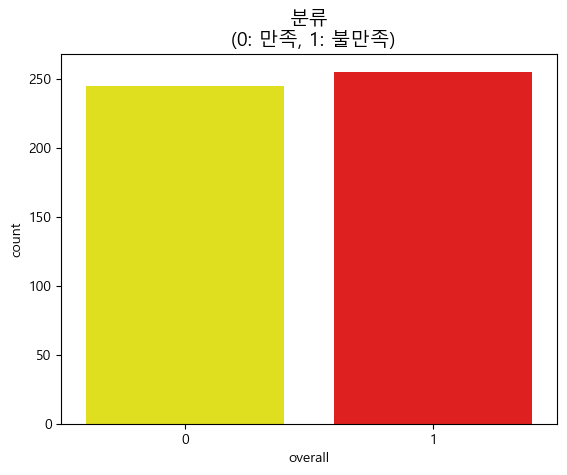

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)

colors = ["yellow", "red"]
sns.countplot(x="overall", data=df, palette=colors)
plt.title("분류\n (0: 만족, 1: 불만족)", fontsize=14)

In [3]:
train_cols = df.columns[0:7]

X = df[train_cols]  # 독립변수
y = df["overall"]

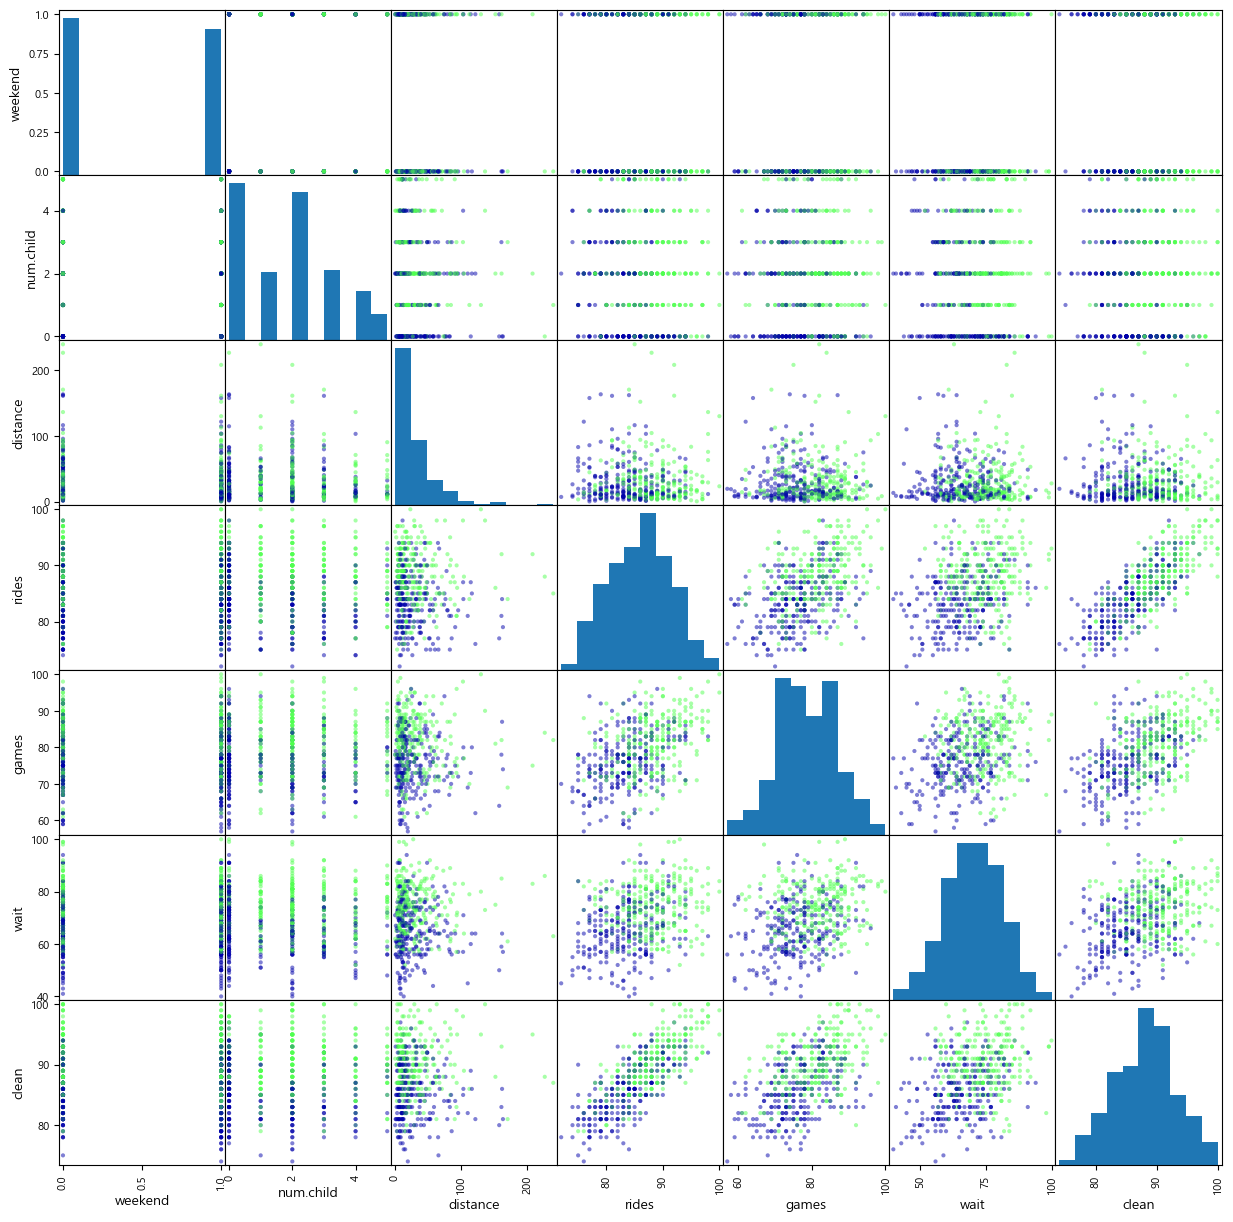

In [4]:
import mglearn

# 산점도 행렬 출력
pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15), marker=".", cmap=mglearn.cm3)
plt.show()

In [5]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=["overall"])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp["overall"].value_counts()

overall
0    245
1    245
Name: count, dtype: int64

In [6]:
X = df_samp[train_cols]  # 독립변수
y = df_samp["overall"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=10
)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


# 분류 모델 구현 함수
def make_model(input_number, hidden_layers, output_number):
    #           변수의 개수    노드 수        출력 노드 수

    # 모델 초기화
    model = Sequential()
    model.add(
        Dense(
            hidden_layers[0],
            activation="relu",
            input_shape=(input_number,),
            name="Hidden_1",
        )
    )

    model.add(Dense(hidden_layers[1], activation="relu", name="Hidden_2"))
    model.add(Dense(hidden_layers[2], activation="relu", name="Hidden_3"))

    # 드롭아웃 계층 Dropout(p) : p라는 확률로 출력 노드의 신호를 보내다 말다 함 → 과적합을 방지하기 위함
    model.add(Dropout(0.2))  # 20%  off

    # 출력층
    model.add(Dense(output_number, activation="sigmoid", name="output"))
    model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

    return model

In [9]:
model = make_model(len(X_train.columns), [128, 64, 32], 1)

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_1 (Dense)                │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_3 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

<Axes: >

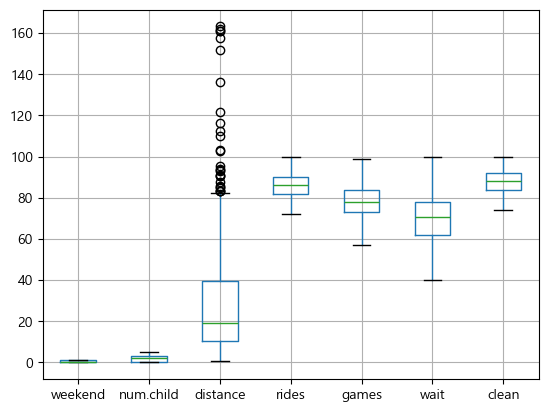

In [11]:
X_train.boxplot()

[[1.         0.         0.10977143 ... 0.5952381  0.16666667 0.65384615]
 [1.         0.4        0.13554088 ... 0.28571429 0.43333333 0.19230769]
 [0.         0.6        0.06495305 ... 0.5        0.48333333 0.30769231]
 ...
 [0.         0.6        0.0730179  ... 0.66666667 0.68333333 0.73076923]
 [1.         0.4        0.41020732 ... 0.33333333 0.3        0.5       ]
 [1.         0.4        0.31775348 ... 0.4047619  0.68333333 0.46153846]]


<Axes: >

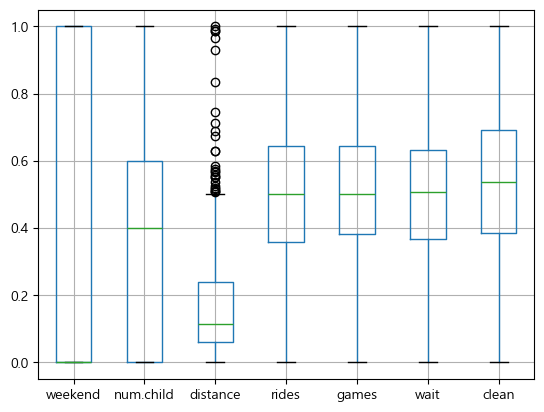

In [12]:
# 0~1 범위 변환
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)

df3 = pd.DataFrame(X_train_scaled, columns=train_cols)
df3.boxplot()

In [13]:
from datetime import datetime
import tensorflow as tf

logdir = "c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
logdir

'c:/logs/20240328-124216'

In [14]:
from keras.callbacks import EarlyStopping

tb = tf.keras.callbacks.TensorBoard(log_dir=logdir)
es = EarlyStopping(monitor="val_loss", patience=5) 
#     조기학습종료        validation loss
hist = model.fit(
    X_train_scaled, y_train, validation_split=0.2, epochs=100, callbacks=[tb, es]
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5305 - loss: 0.2471 - val_accuracy: 0.5570 - val_loss: 0.2290
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5198 - loss: 0.2399 - val_accuracy: 0.7089 - val_loss: 0.2278
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5728 - loss: 0.2373 - val_accuracy: 0.6329 - val_loss: 0.2147
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6067 - loss: 0.2303 - val_accuracy: 0.7215 - val_loss: 0.2070
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7460 - loss: 0.2136 - val_accuracy: 0.7342 - val_loss: 0.1986
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7488 - loss: 0.2047 - val_accuracy: 0.7468 - val_loss: 0.1833
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7526 - loss: 0.1880 - val_accuracy: 0.7595 - val_loss: 0.1728
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8020 - loss: 0.1745 - val_accuracy: 0.7722 - 

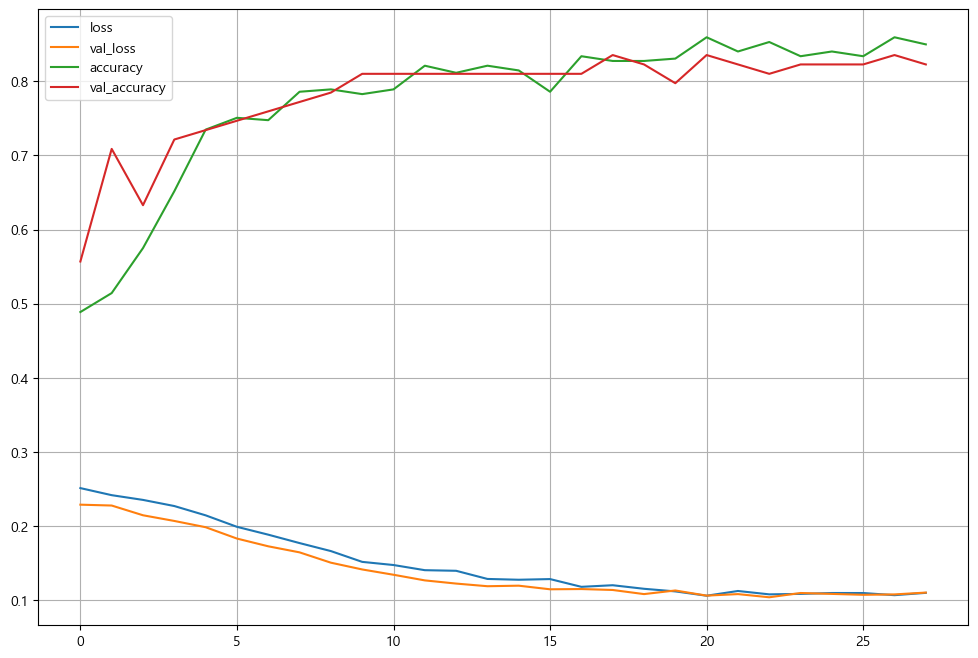

In [15]:
# 모델 학습 과정 표시
plt.figure(figsize=(12, 8))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.legend(["loss", "val_loss", "accuracy", "val_accuracy"])
plt.grid()
plt.show()

In [16]:
# 모델 평가
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print(scores)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))  # 학습용

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8775 - loss: 0.0953
[0.09765331447124481, 0.8596938848495483]
compile_metrics: 85.97%


In [17]:
scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print(scores)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))  # 검증용

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8080 - loss: 0.1301 
[0.11074955761432648, 0.795918345451355]
compile_metrics: 79.59%


In [18]:
model.save('c:/data/rides/rides_keras.keras')

In [19]:
pred = model.predict(X_test_scaled[:5])
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.9361664 ],
       [0.06435011],
       [0.08317213],
       [0.53289557],
       [0.77301586]], dtype=float32)

In [20]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 새로운 값 예측(주말여부, 자녀수, 거리, 놀이기구만족도, 게임만족도, 대기시간, 청결도)
test_set = [[0, 2, 20, 84, 78, 67, 89]]
test_set_scaled = scaler.transform(test_set)

print(model.predict(test_set_scaled))  # 1일 확률 0%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.78016794]]


c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [21]:
# 새로운 값 예측(주말여부, 자녀수, 거리, 놀이기구만족도, 게임만족도, 대기시간, 청결도)

test_set = [[1, 0, 10, 90, 78, 67, 89]]
test_set_scaled = scaler.transform(test_set)

print(model.predict(test_set_scaled))  # 1일 확률 0%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[0.19927871]]


c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [22]:
import joblib
#scaler 백업
joblib.dump(scaler, 'c:/data/rides/scaler.sav')

['c:/data/rides/scaler.sav']

In [23]:
# scaler 복원
scaler = joblib.load("c:/data/rides/scaler.sav")